In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.interpolate import interp1d
from scipy.integrate import odeint
import seaborn as sns
sns.set_context('talk')

def fitK(T,mu):
    p = linregress(1/(T+273.15),np.log(mu))
    ka = np.exp(p.intercept)
    EaR = -a.slope
    return lambda T: ka*np.exp(-EaR/(T+273.15))

T = np.array([10.5, 12.0, 14.5])

muG = fitK(T,[0.01348, 0.01606, 0.02554])
muM = interp1d(T,[0.02581, 0.02563, 0.02266],kind='quadratic')
muN = interp1d(T,[0.09881, 0.07069, 0.03913],kind='quadratic')
KG = interp1d(T,[0.07464, 0, 0],kind='linear')


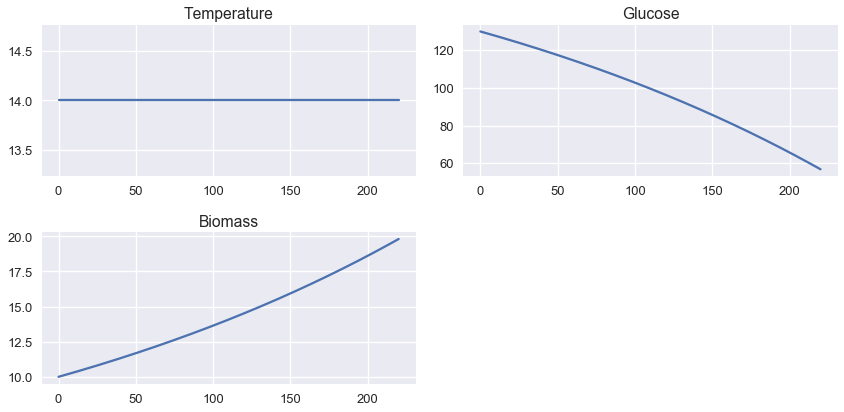

In [70]:
IC = np.array([14.0,130,10.0])

def mu1(T,G):
    return muG(T)*G/(KG(T)+G)

def mux(T,G):
    return 0.134*mu1(T,G)

def deriv(Z,t):
    T,G,X = Z
    dT = 0
    dG = -X*mu1(T,G)
    dX = X*mux(T,G)
    return [dT,dG,dX]

t = np.linspace(0,220,1000)

Z = odeint(deriv,IC,t)

T,G,X = Z.T

plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.plot(t,T)
plt.title('Temperature')

plt.subplot(2,2,2)
plt.plot(t,G)
plt.title('Glucose')

plt.subplot(2,2,3)
plt.plot(t,X)
plt.title('Biomass')

plt.tight_layout()
    

In [46]:
mux(10.5,120)

In [44]:
mu1(10.5,130)

0.013112386137746469